<a href="https://colab.research.google.com/github/Mohamed-Abdelhadi/Housing_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/housing.csv")

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

In [ ]:
train_data.hist(figsize=(15, 8))

In [73]:
encoded_train_data = pd.get_dummies(train_data)

correlation_matrix = encoded_train_data.corr()


In [ ]:
correlation_matrix

<Axes: >

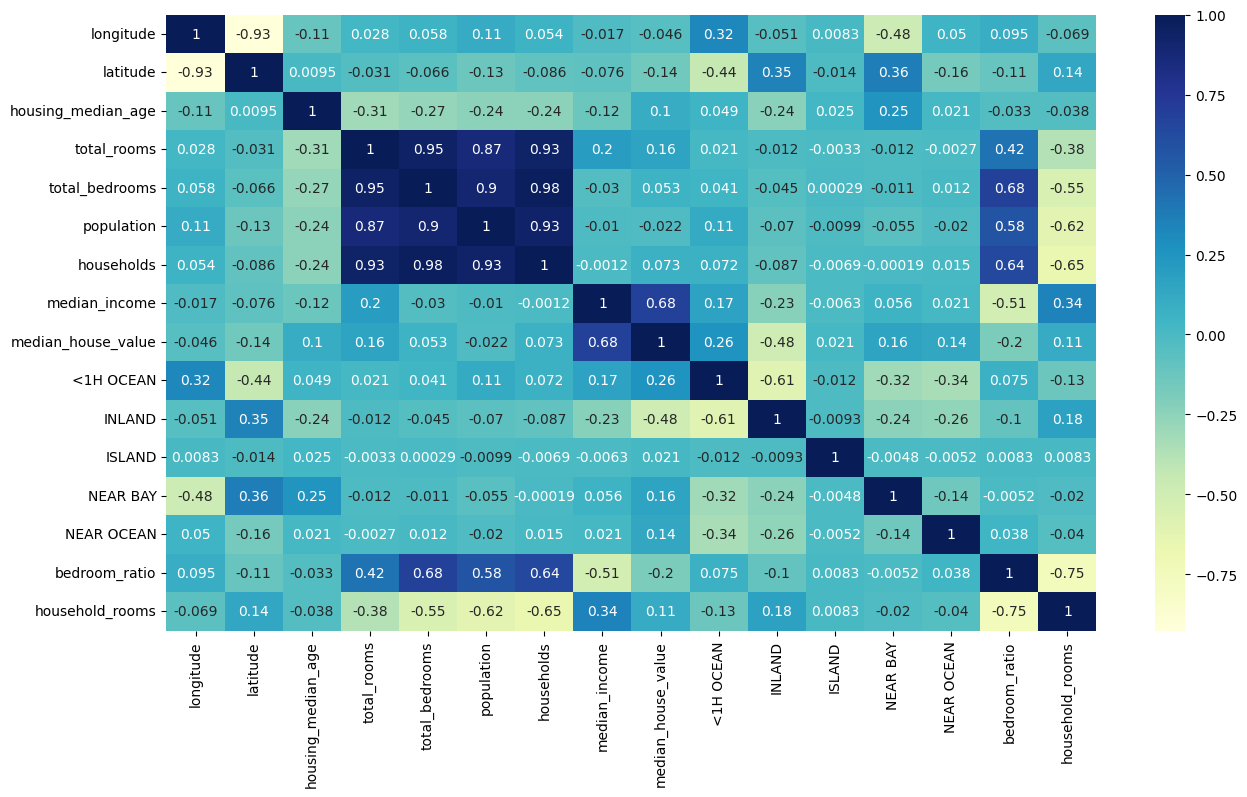

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [ ]:
train_data.hist(figsize=(15, 8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [ ]:
train_data

<Axes: >

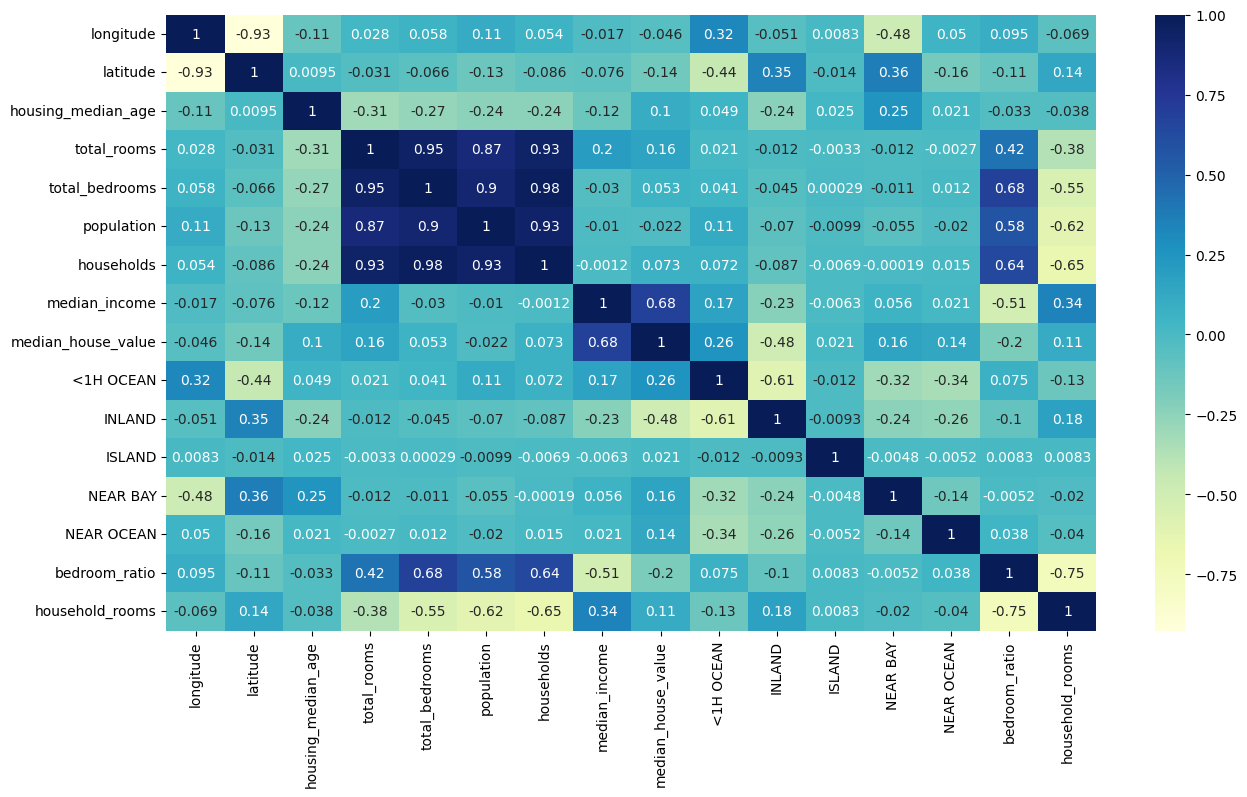

In [75]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

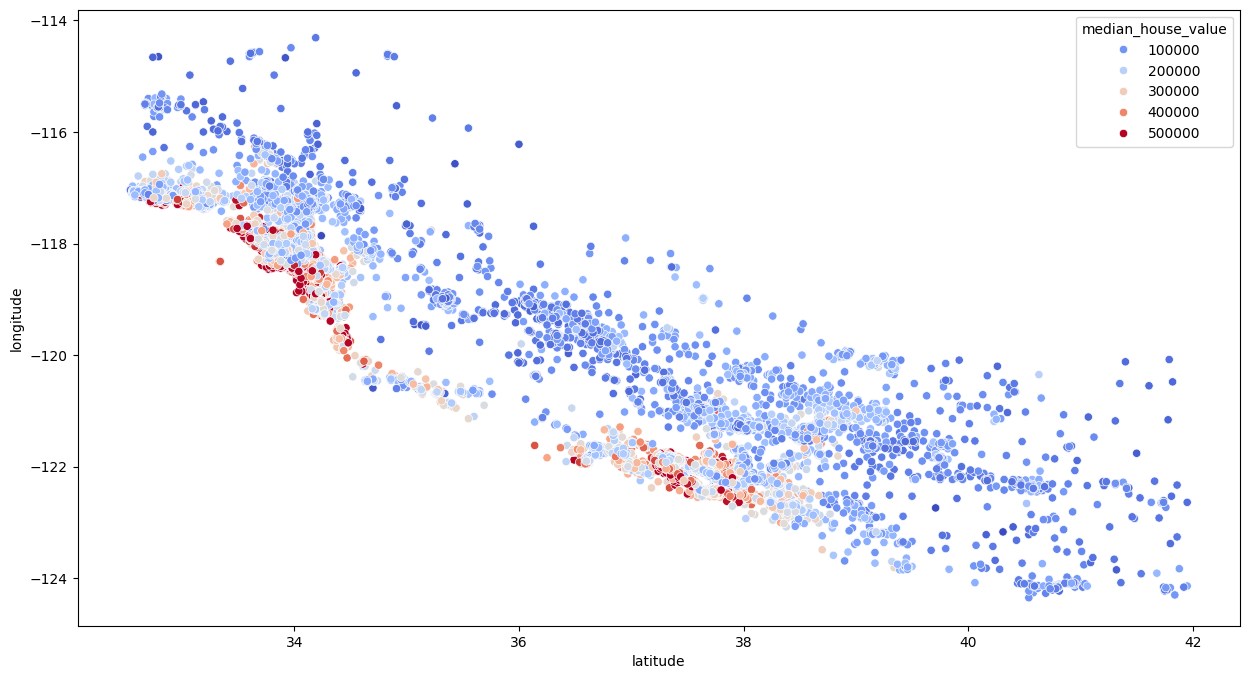

In [76]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

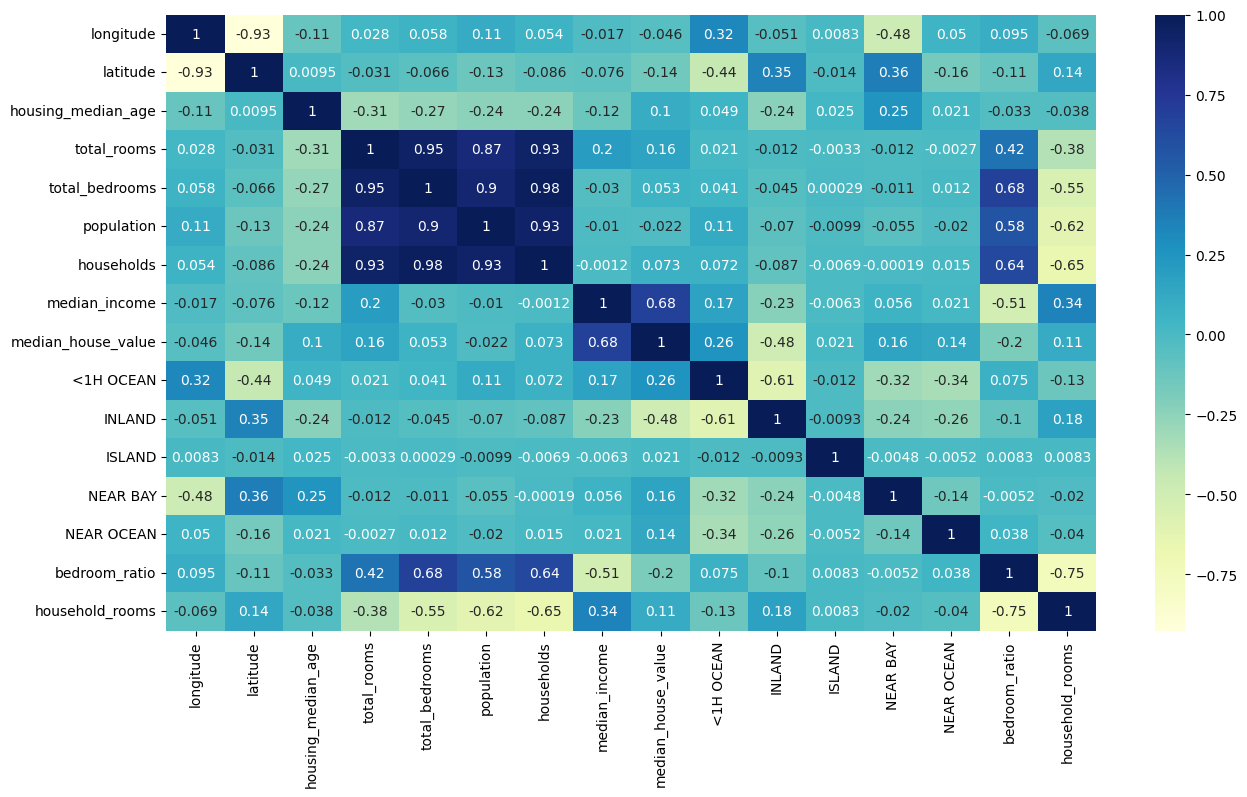

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']
x_tain_s = scalar.fit_transform(x_train)
reg = LinearRegression()

reg.fit(x_tain_s, y_train)


In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [ ]:
x_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']

In [ ]:
x_test_s = scalar.transform(x_test)
x_train_s = scalar.transform(x_train)

In [ ]:
reg.score(x_test_s, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

In [ ]:
forest.score(x_test_s, y_test)

In [70]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(x_tain_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [72]:
grid_search.best_estimator_.score(x_test_s, y_test)

0.8243168288438658